---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Fake News Classifier

With humanity's technological advancement, news began to spread easier and faster. Day by day we are stormed with information, including news articles. Those news can be sent from one person to another, just by using their smartphones. Eventually, the spread of misinformation became more and more common. Fake news, _i.e._ pieces of information that do not accurately represent reality (events, opinions, or facts) in any way, can spread like wildfire.

<p align=center>
<img src="img/fk.jpg" width="40%"><br>
<i><sup>Image credits: vectorjuice @ <a href="https://www.freepik.com/author/vectorjuice">freepik</a>.</sup></i>
</p>

We are inclined to assume that particularly famous news companies — or even a close friend — are trustworthy sources, and thus we are susceptible to believing that what is being shared with us by these sources is true. This in turn can increase the spread of misinformation, and it can possess detrimental outcomes in several social and political scenarios. Thus, it has become increasingly important to be able to discern the truth from the lies.

## The project

Identifying fake news is no easy task. However, several tools available today can use text data to predict whether or not it represents the truth. Some of these tools are deep-learning ***Neural Networks***, which make this task easier. Our goal here will be to employ these neural networks through the **Tensorflow** library.

For our project, we are going to use the fake news dataset made available at [Kaggle](https://www.kaggle.com/competitions/fake-news/data).

## Data preparation

### Importing packages

In [4]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Setting seed
np.random.seed(6327)

# # Filter warnings
# import warnings
# warnings.filterwarnings('ignore')

### Importing and checking the data

In [5]:
# Reading data
df = pd.read_csv("data/train.csv", index_col='id')

In [6]:
# Checking first entries
print(df.shape)
df.head()

(20800, 4)


,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


We have a dataset with 20,800 entries and 4 variables:

* `title` = Composed by the title of the news article.
* `author` = Who wrote the article.
* `text` = The actual body of the news article.
* `label` = Whether or not the news was likely to be false (1 = Fake News).

Now, we can proceed to adjust the data in order to create our deep learning model.

### Preparing text data

Since we are dealing with `strings`, i.e. text data, in natural language form we must apply some *Natural Language Processing* (NLP) principles so that we can successfully use our data to predict fake news and obtain the best results.

The first step is to convert all our text to lowercase and strip our text of all punctuation markers.

In [7]:
# Creating a function to prepare entries
import string

def cleanText(text):
    """
    Clean a string of all punctuation characters.
    """
    # Splitting incoming data into separate words
    words = str(text).split()
    # Switching to lowercase and adding " "
    words = [i.lower() + " " for i in words]
    # Joining
    words = " ".join(words)
    # Removing punctuation
    words = words.translate(words.maketrans('', '', string.punctuation))

    return words

In [8]:
# Applying our function
df['text'] = df['text'].apply(cleanText)
df.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide we didn’t even see comey...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,ever get the feeling your life circles ...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,why the truth might get you fired octob...,1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos 15 civilians killed in single us ...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print an iranian woman has been sentence...,1


Now that we have cleaned our text, we can proceed with splitting our dataset into training (`df_train`), validation (`df_val`) and testing (`df_test`) datasets and check their respective resulting sizes:

In [9]:
# Splitting train and validation sets
df_train, df_test = train_test_split(df)
df_train, df_val = train_test_split(df_train, test_size = 0.2)

In [51]:
# Dataset sizes
print('Training dataset size = ', len(df_train))
print('Validation dataset size = ', len(df_val))
print('Testing dataset size = ', len(df_test))

Training dataset size =  12480
Validation dataset size =  3120
Testing dataset size =  5200


In addition to removing punctuation and switching all letters to lowercase, we must further process our data for it to be adequate for downstream predictions. Three main steps can be considered important here, and they are: **Tokenization**, **Normalisation** and **Substituition**<sup><a href="https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html">1</a></sup>.

**Tokenization** refers to the process of splitting long strings of text into small pieces, which are called _tokens_. It can be also referred to as text segmentation<sup><a href="https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html">1</a></sup>.

**Normalization** means to put the text in the same level of information. This includes switching cases and removing punctuation (both of which we already did), converting numbers to written form, removing affixes (_stemming_) and converting words to their canonical forms (the word's lemma, a process called _lemmatization_), _et cetera_<sup><a href="https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html">1</a></sup>.

**Substitution** is the process of eliminating noise in the dataset. This noise can exist as unwanted information present in extracted data, such as file headers, markup and metadata, tags in specific file formats and so on<sup><a href="https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html">1</a></sup>.

In this project, to keep things simple since we are dealing with mostly plain text, aside from some normalisation, we must ***tokenize*** our data. After tokenization, we have to also ***pad*** our sequences. **Padding** refers to the process of masking our tokens so that they all have the same sequence length by adding "empty" values to them<sup><a href="https://keras.io/guides/understanding_masking_and_padding/#:~:text=Padding%20is%20a%20special%20form,pad%20or%20truncate%20some%20sequences">2</a></sup>.

For these tasks, we use two tools from Tensorflow/Keras: `Tokenizer` and `pad_sequences`.

In [52]:
## Tokenizing and padding text

# Importing tools
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Defining parameters
vocab_size = 10000          # Maximum vocabulary size for our data
trunc_type = 'post'         # Setting truncation and padding method to post data
pad_type = 'post'
oov_tok = '<OOV>'           # Token for 'out of vocabulary' words

# Initializing tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Fitting to data
tokenizer.fit_on_texts(df_train['text'])

# Getting word index
word_index = tokenizer.word_index

## Tokenizing and padding

# Training set
train_sequences = tokenizer.texts_to_sequences(np.array(df_train['text']))
train_padded = pad_sequences(train_sequences, truncating=trunc_type, padding=pad_type)
max_lenght = len(train_padded[0])

# Validation set
val_sequences = tokenizer.texts_to_sequences(np.array(df_val['text']))
val_padded = pad_sequences(val_sequences, truncating=trunc_type, padding=pad_type, maxlen=max_lenght)

Now we can finally prepare our input for the deep-learning model.

In [53]:
# Creating inputs for tensorflow
X_train = np.copy(train_padded)
X_val = np.copy(val_padded)
y_train = df_train['label'].values
y_val = df_val['label'].values

# Testing array sizes
print('Train = ', len(X_train))
print('Target = ', len(y_train), '\n')
print('Validation = ', len(X_val))
print('Target = ', len(y_val))

Train =  12480
Target =  12480 

Validation =  3120
Target =  3120


### Preparing our model

Much like for a regular machine learning task, one can perform a RandomSearch to discover the best hyperparameters for a given model. However, due to the size and complexity of the model, this would take a long time. Instead, we are going to use some parameters which were provided beforehand.

For dealing with sequential (text) data with singular inputs/outputs, we will create a `Sequential` model that will accommodate a stack of layers<sup><a href="https://keras.io/guides/sequential_model/">3</a></sup>.

The first layer of our model will be the `Embedding` layer. Mostly used in NLP, it allows us to encode our word variables from text data by converting them to the same size and encoding them into numbers. This permits our model to operate efficiently with our data<sup><a href="https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce">3</a></sup>.

The `Conv1D` layer creates a 1-dimensional convolutional layer, i.e. a convolution kernel that is convolved with the layer input over one dimension only, making it a suitable approach to dealing with sequential data<sup><a href="https://keras.io/api/layers/convolution_layers/convolution1d/">4</a>,</sup><sup><a href="https://becominghuman.ai/1-dimensional-convolution-layer-for-nlp-task-5d2e86e0229c">5</a></sup>.

_Pooling_ is similar to dimensional reduction for Convolutional Neural Networks, where the data is divided into subsections and a value is calculated that best represents the given subsection, which helps the algorithm to learn better. The _Max Pooling_ (`GlobalMaxPooling1D`) will take the maximum value in a window of two (default value)<sup><a href="https://towardsdatascience.com/nlp-with-cnns-a6aa743bdc1e">6</a></sup>.

The `Dense` layer will then connect all the "neurons" of the neural network and use a sigmoidal curve to determine the predictions.











In [54]:
# Creating and fitting model
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, (155), input_length=max_lenght),
        tf.keras.layers.Conv1D(16, 5, activation='relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, verbose=2, epochs=5, validation_data=(X_val, y_val),
                    callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=6)])

Epoch 1/5
390/390 - 80s - loss: 0.2397 - accuracy: 0.9086 - val_loss: 0.0694 - val_accuracy: 0.9740 - 80s/epoch - 204ms/step
Epoch 2/5
390/390 - 79s - loss: 0.0400 - accuracy: 0.9883 - val_loss: 0.0485 - val_accuracy: 0.9804 - 79s/epoch - 203ms/step
Epoch 3/5
390/390 - 79s - loss: 0.0128 - accuracy: 0.9973 - val_loss: 0.0446 - val_accuracy: 0.9830 - 79s/epoch - 202ms/step
Epoch 4/5
390/390 - 81s - loss: 0.0040 - accuracy: 0.9999 - val_loss: 0.0449 - val_accuracy: 0.9840 - 81s/epoch - 207ms/step
Epoch 5/5
390/390 - 80s - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0464 - val_accuracy: 0.9830 - 80s/epoch - 205ms/step


We can see that the accuracy of our model started already quite high, especially in the validation set, and further increased with the increase in epochs (the iterations) of the model. We can further visualize this as plots:

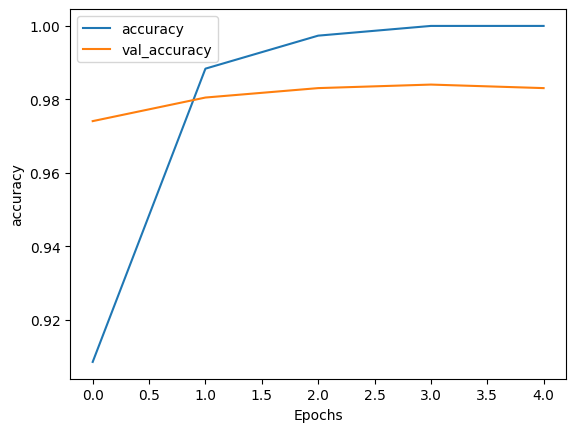

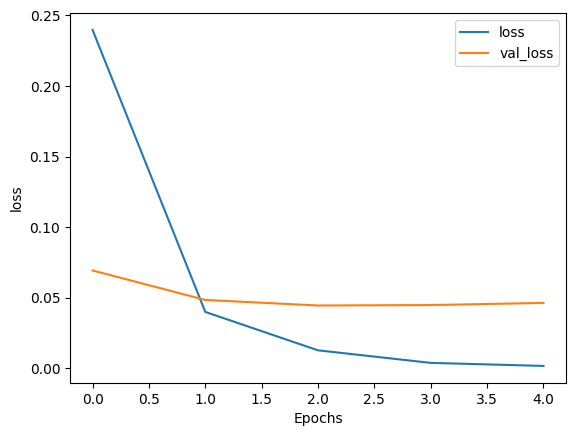

In [55]:
# Inspecting results
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Making predictions on Test Set

The next step is to use our model to predict the previously separated test data. First, we have to process it like we did with the training and validation sets.

In [56]:
# Test set
test_sequences = tokenizer.texts_to_sequences(np.array(df_test['text']))
test_padded = pad_sequences(test_sequences, truncating=trunc_type, padding=pad_type, maxlen=max_lenght)

In [57]:
# Making the predictions
predict = np.round(model.predict(test_padded))

# Length of result
len(predict)

163/163 [==============================] - 7s 41ms/step


5200

And then we check the accuracy of our predictions:

In [58]:
# Checking accuracy
accuracy = sum(1 if i==j else 0 for i,j in zip(predict, df_test['label'].values)) / len(df_test)
print('Accuracy = ', np.round(accuracy, 4))

Accuracy =  0.9835


The model had very high accuracy on the test data, of 0.98, meaning that the model captured well the features that defined the news as potentially fake or not.

# Conclusions

Dealing with text data is a common task in Machine Learning. Deep Learning techniques are especially well suited to dealing with Natural Language Processing, as they can uncover hidden patterns in data.

By applying some Deep Learning techniques through Tensorflow and Keras, we were able to achieve 0.98 accuracy when predicting Fake News data on data previously unseen by the model. This even happened by preparing the data with simple steps, meaning that perhaps the model could be further improved (even if by a narrow margin) if other preparation steps were performed.

# References

1: https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html

2: https://keras.io/guides/understanding_masking_and_padding/

3: https://keras.io/guides/sequential_model/

4: https://keras.io/api/layers/convolution_layers/convolution1d/

5: https://becominghuman.ai/1-dimensional-convolution-layer-for-nlp-task-5d2e86e0229c

6: https://towardsdatascience.com/nlp-with-cnns-a6aa743bdc1e